#### Sales Prediction
#### (Simple Linear Regression)

Name: **Brayan Olivares**

#### Import Libraries

In [1]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Import the Dataset

In [2]:
df = pd.read_csv('Salary_dataset.csv')

Data Inspection

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Exploratory Data Analysis

Outlier Analysis

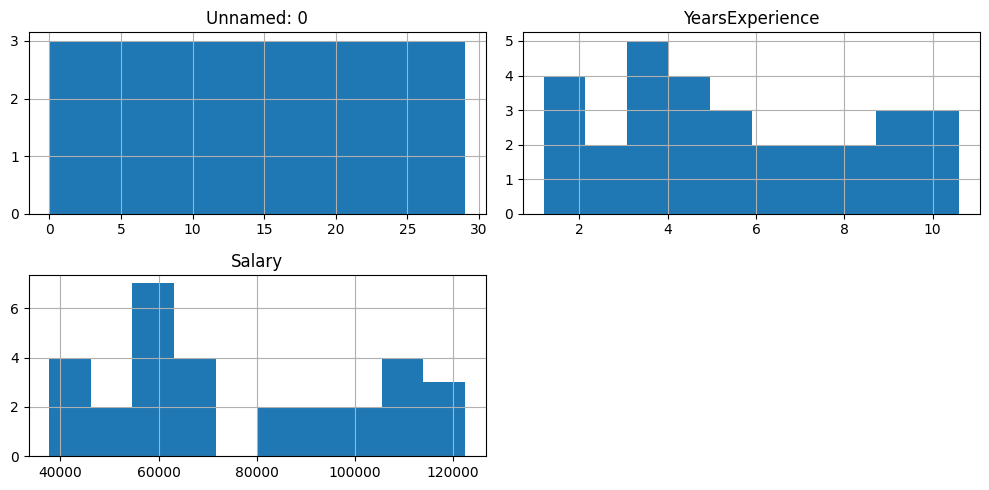

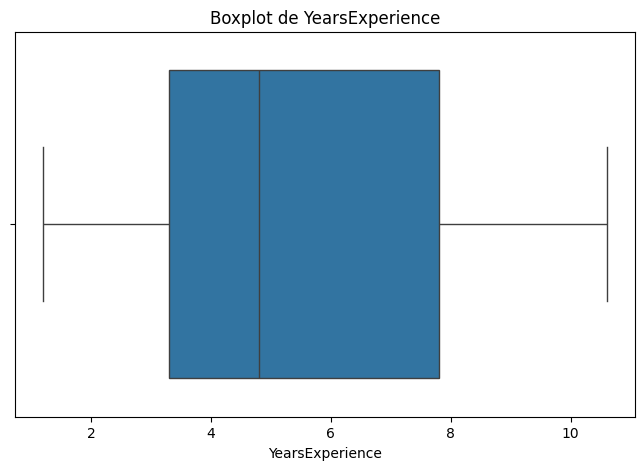

In [8]:
df.hist(figsize=(10,5))
plt.tight_layout()
plt.show()
# Boxplot para YearsExperience
plt.figure(figsize=(8,5))
sns.boxplot(x=df['YearsExperience'])
plt.title('Boxplot de YearsExperience')
plt.show()

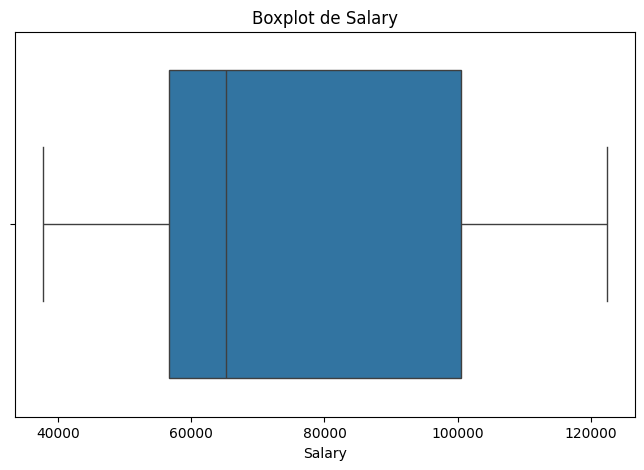

In [9]:
# Boxplot para Salary
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot de Salary')
plt.show()

Correlation Analysis

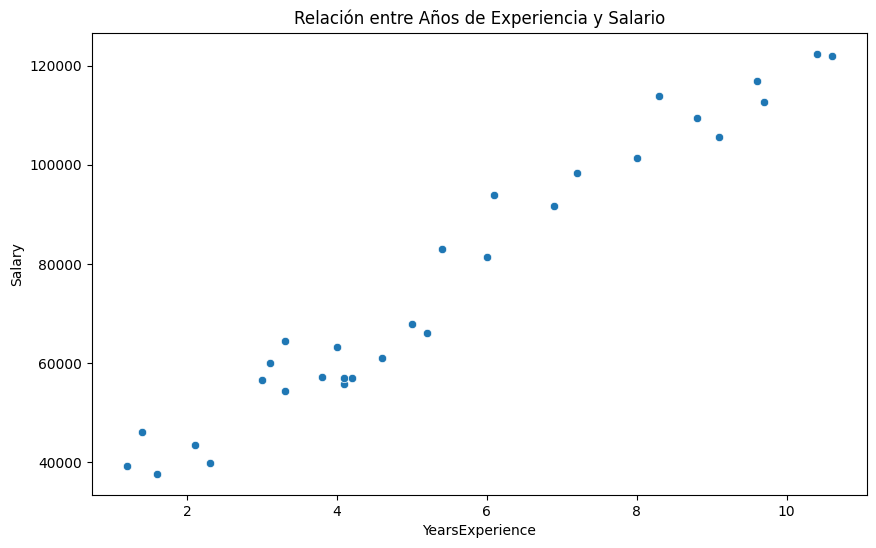

Coeficiente de correlación: 0.9782416184887599


In [10]:
# Gráfico de dispersión y correlación
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relación entre Años de Experiencia y Salario')
plt.show()

print(f"Coeficiente de correlación: {df['YearsExperience'].corr(df['Salary'])}")

Building the model

Separating predictor and target

In [11]:
# Separating predictor and target 
X = df[['YearsExperience']]
y = df['Salary']

Train-Test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (24, 1)
Tamaño del conjunto de prueba: (6, 1)


In [14]:
# Verificar la distribución
print("\nDistribución en entrenamiento:")
print(y_train.describe())
print("\nDistribución en prueba:")
print(y_test.describe())


Distribución en entrenamiento:
count        24.000000
mean      74208.625000
std       28240.733473
min       37732.000000
25%       55457.750000
50%       62165.500000
75%       99031.250000
max      122392.000000
Name: Salary, dtype: float64

Distribución en prueba:
count         6.000000
mean      83185.500000
std       24757.930695
min       57190.000000
25%       65319.250000
50%       75514.000000
75%      105249.250000
max      113813.000000
Name: Salary, dtype: float64


Train the model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluate the model with training data

In [16]:
y_train_pred = model.predict(X_train)

Métricas para datos de entrenamiento:
RMSE: 5205.982110155715
R²: 0.9645401573418148


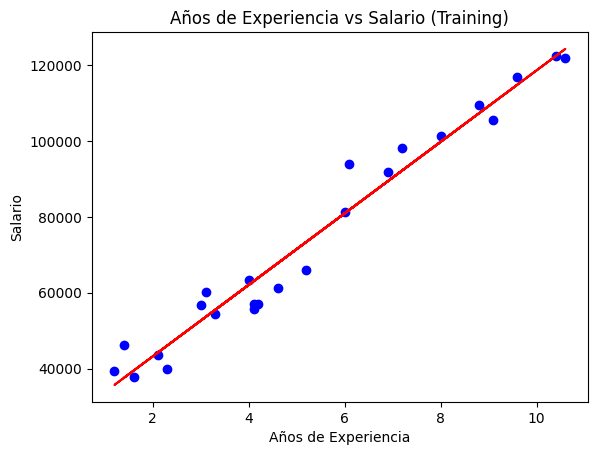

In [17]:
print("Métricas para datos de entrenamiento:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"R²: {r2_score(y_train, y_train_pred)}")

# Gráfico de la línea de regresión en training
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.title('Años de Experiencia vs Salario (Training)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

Evaluate the model with Test data

In [18]:
y_test_pred = model.predict(X_test)

In [19]:
print("\nMétricas para datos de prueba:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R²: {r2_score(y_test, y_test_pred)}")


Métricas para datos de prueba:
RMSE: 7059.043621901506
R²: 0.9024461774180498


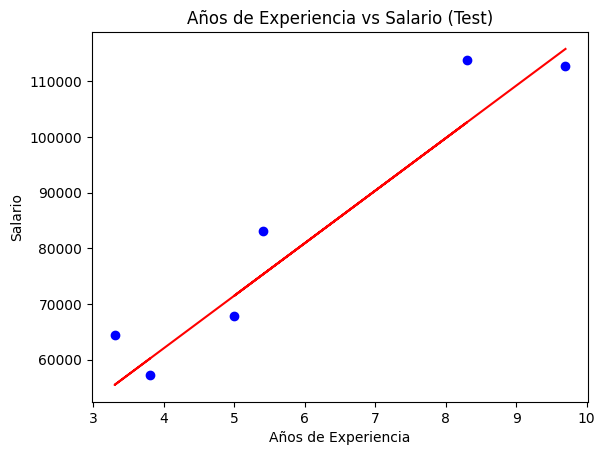

In [20]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.title('Años de Experiencia vs Salario (Test)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

In [21]:
# Coeficientes del modelo
print("\nCoeficientes del modelo:")
print(f"Intercepto (b0): {model.intercept_}")
print(f"Pendiente (b1): {model.coef_[0]}")


Coeficientes del modelo:
Intercepto (b0): 24380.20147947369
Pendiente (b1): 9423.81532303098


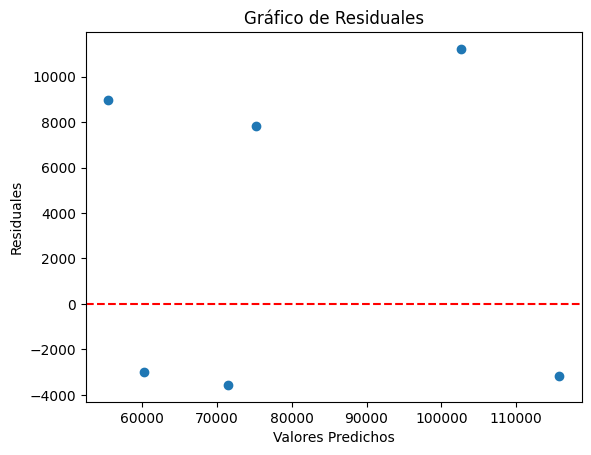

In [22]:
# Residual plot
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuales')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.show()

In [24]:
# Predicción de ejemplo
years_exp = [[5.5]]
predicted_salary = model.predict(years_exp)
print(f"\nPara {years_exp[0][0]} años de experiencia, el salario predicho es: ${predicted_salary[0]:.2f}")


Para 5.5 años de experiencia, el salario predicho es: $76211.19


C:\Users\braya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
